In [169]:
import numpy as np
import pandas as pd
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
import string
import re
from nltk.stem import *
from pymystem3 import Mystem

Задача 1 (2 балла). Чтение данных
Прочитайте данные из файла spam.csv, используя средства модуля pandas. В первом столбце пометка о роде письма (spam/ham). Будем считать, что все письма с пометкой spam лежат в первом классе, а остальные - в нулевом. Во второй колонке текст сообщения. Отобразите таблицу в следующем виде:

In [170]:
spam_ham = pd.read_csv('spam.csv', sep=',', encoding='latin-1')
spam_ham_columns = spam_ham.loc[:, ['v2','v1']]
spam_ham_columns.columns = ['text', 'v1']

text_class = []
for i in spam_ham_columns['v1']:
    if i == 'ham':
        text_class.append(0)
    elif i == 'spam':
        text_class.append(1)

new_frame = pd.DataFrame(text_class)
new_frame.columns = ['class']

result = pd.concat([spam_ham_columns.loc[:, ['text']], new_frame], axis=1)
result.head()

,text,class
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


Задача 2 (3 балла). Предобработка
Переведите все буквы в нижний регистр.
С помощью регулярных выражений почистите текст, отставляя только слова (удалите знаки препинания; все числа можно заменить на N и т.п.).
Оформите это в виде функции, которая принимает на вход некоторый список текстов и возвращает, соответственно, предобработанный список текстов.
Преобразуйте таблицу с данными так, чтобы в ней содержались предобработанные тексты (далее мы будем работать только с ними).

In [176]:
def preprocess(list_of_texts):
    preprocessed_texts = []
    words_filtered = []

    for text in list_of_texts:
        tokenizedWords = TreebankWordTokenizer().tokenize(text.lower())
        
        for wf in tokenizedWords:
            for w in re.findall(r'(\w+)', wf):
                for wtf in re.findall(r'(\D+)', w):
                    words_filtered.append(wtf)
        preprocessed_texts.append(' '.join(words_filtered))
        words_filtered = []
    return preprocessed_texts


In [177]:
def to_upd_df(list_of_texts):
    
    global new_frame
    
    new_texts_df = pd.DataFrame({'col': list_of_texts})
    new_texts_df.columns = ['text']

    pr_txt_clss = pd.concat([new_texts_df, new_frame], axis = 1)
    return pr_txt_clss

In [179]:
new_texts_1 = preprocess(result['text'])

In [180]:
pr_txt_1clss = to_upd_df(new_texts_1)
pr_txt_1clss.head()

,text,class
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in a wkly comp to win fa cup final ...,1
3,u dun say so early hor u c already then say,0
4,nah i do n t think he goes to usf he lives aro...,0


Задача 3 (3 балла). Формирование словаря
Сформируйте словарь, ключами которого являются слова, встречающиеся в тексте, а значениями -- количество раз, которое они встретились в корпусе текста.
Оформите это в виде функции, которая принимает на вход список текстов и возвращает словарь.
Какой размер словаря вы получили?

In [181]:
def text_to_dict(text_list):

    bag_of_words = []

    for txt in text_list:
        for wrd in txt.split():
            bag_of_words.append(wrd)
        
    unique_words = list(set(bag_of_words))

    numbers = []
    for item in unique_words:
        word_num = bag_of_words.count(item)
        numbers.append(word_num)
    
    dictionary = dict(zip(unique_words, numbers))
    
    return dictionary


In [182]:
first_dict = text_to_dict(pr_txt_1clss['text'])

In [184]:
print('Размер словаря', len(first_dict))

Размер словаря 7753


Задача 4 (2 балла). Удаление стоп-слов.
Отсортируйте слова по убыванию частоты их встречаемости в текстах.
С помощью модуля matplotlib.pyplot постройте график частот встречаемости слов в тексте.
Распечатайте топ-10 слов и их частоты.
Какие слова чаще всего встречаются в тексте? Значимые ли это слова?

In [185]:
def freq_sort(dictionary):
    dict_words = list(dictionary.keys())
    dict_freq = list(dictionary.values())

    almost_done = list(zip(dict_words, dict_freq))
    almost_done.sort(key = lambda almost_done: almost_done[1], reverse=True)
    
    return almost_done

In [186]:
first_sorted = freq_sort(first_dict)

In [187]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [188]:
def to_plot(list_of_tuples):
    new_df = pd.DataFrame(list_of_tuples)
    new_df.columns = ['word', 'frequency']

    new_df.plot(x = 'word', y = 'frequency', figsize = (10.4, 6.8))


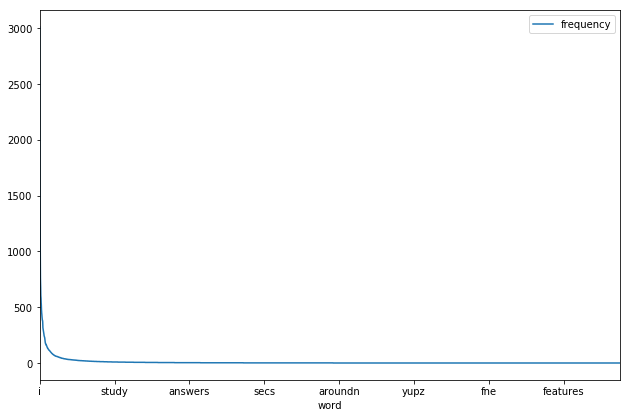

In [189]:
to_plot(first_sorted)

In [190]:
first_sorted[:10]

[('i', 3011),
 ('to', 2242),
 ('you', 2242),
 ('a', 1449),
 ('the', 1332),
 ('u', 1212),
 ('and', 979),
 ('in', 902),
 ('is', 901),
 ('me', 814)]

Вывод: чаще всего используются личные местоимения, союзы и артикли, которые не несут значительной смысловой нагрузки

Задача 5 (5 баллов). Функциия предобработки и удаление стоп-слов.
Для удаления стоп-слов можно использовать модуль nltk. Импортируйте stopwords из nltk.corpus, далее, чтобы получить список английских стоп-слов, нужно сделать stopwords.words('english').
Перепишите функцию предобработки так, чтобы она на вход принимала список текстов и список стоп-слов, чистила текст (в том числе удаляла стоп-слова), возвращала список предобработанных текстов.
Преобразуйте таблицу с данными так, чтобы в ней содержались новые предобработанные тексты (далее мы будем работать только с ними).
Сформируйте словарь.
Постройте график частот встречаемости слов в тексте.
Распечатайте топ-10 слов и их частоты.
Какой размер словаря вы получили теперь? Остались ли ещё высокочастотные неинформативные слова? Что это за слова? Добавте их в список стоп-слов и повторите процедуру.

In [191]:
stopWords = set(stopwords.words('english'))

In [192]:
def preprocess_stopWds(list_of_texts, list_of_SW):
    preprocessed_texts = []
    text = []
    
    for txt in list_of_texts:
        for w in txt.split():
            if w not in list_of_SW:
                text.append(w)
            
        preprocessed_texts.append(' '.join(text))
        text = []
                
    return preprocessed_texts

In [193]:
new_texts_2 = preprocess_stopWds(pr_txt_1clss['text'], stopWords)

In [195]:
pr_txt_2clss = to_upd_df(new_texts_2)
pr_txt_2clss.head()

,text,class
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah n think goes usf lives around though,0


In [196]:
second_dict = text_to_dict(pr_txt_2clss['text'])

In [197]:
second_sorted = freq_sort(second_dict)

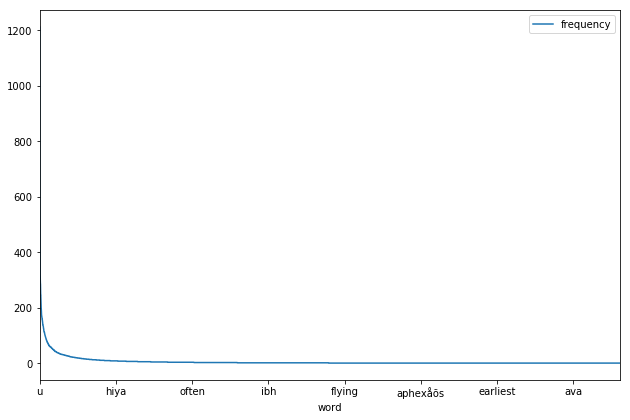

In [198]:
to_plot(second_sorted)

In [199]:
second_sorted[:40]

[('u', 1212),
 ('call', 606),
 ('n', 532),
 ('get', 397),
 ('ur', 385),
 ('gt', 318),
 ('lt', 316),
 ('å', 304),
 ('ok', 292),
 ('free', 288),
 ('go', 286),
 ('know', 261),
 ('got', 252),
 ('good', 245),
 ('like', 245),
 ('day', 240),
 ('come', 230),
 ('time', 220),
 ('love', 209),
 ('send', 199),
 ('want', 195),
 ('text', 195),
 ('p', 186),
 ('txt', 184),
 ('one', 175),
 ('going', 173),
 ('r', 171),
 ('need', 168),
 ('home', 167),
 ('stop', 163),
 ('lor', 162),
 ('sorry', 160),
 ('k', 160),
 ('today', 160),
 ('see', 158),
 ('still', 157),
 ('back', 153),
 ('da', 151),
 ('reply', 148),
 ('dont', 144)]

In [200]:
print(len(second_dict), 'vs', len(first_dict))

7616 vs 7753


После удаления стоп-слов словарь стал короче на 137 слов. При этом остались довольно частотные, но семантически мало значимые или совсем незначимые слова: 'u','call', 'n','get', 'ur', 'gt', 'lt', 'å', 'ok', 'got', 'p', 'r', 'k', 'da', 'lor'.
Добавим их к списку слов и проведем обработку текстов еще раз:

In [201]:
add_SW = ['u','call', 'n','get', 'ur', 'gt', 'lt', 'å', 'ok', 'got', 'p', 'r', 'k', 'da', 'lor']
SW_upd = list(stopWords) + add_SW


In [202]:
new_texts_3 = preprocess_stopWds(pr_txt_2clss['text'], SW_upd)

In [203]:
pr_txt_3clss = to_upd_df(new_texts_3)
pr_txt_3clss.head()

,text,class
0,go jurong point crazy available bugis great wo...,0
1,lar joking wif oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,dun say early hor c already say,0
4,nah think goes usf lives around though,0


In [204]:
third_dict = text_to_dict(pr_txt_3clss['text'])

In [205]:
third_sorted = freq_sort(third_dict)

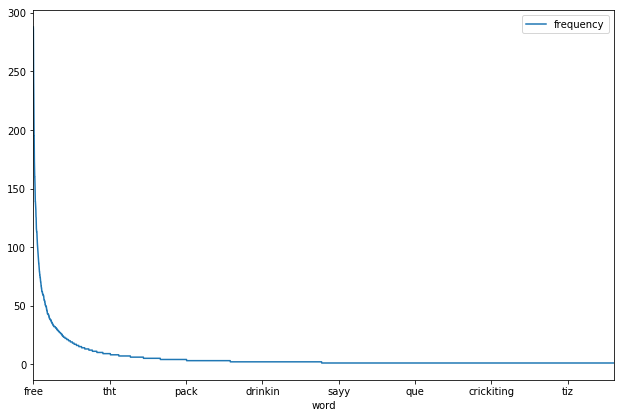

In [206]:
to_plot(third_sorted)

In [207]:
third_sorted[:10]

[('free', 288),
 ('go', 286),
 ('know', 261),
 ('good', 245),
 ('like', 245),
 ('day', 240),
 ('come', 230),
 ('time', 220),
 ('love', 209),
 ('send', 199)]

In [208]:
print(len(third_dict), 'vs', len(second_dict), 'vs', len(first_dict))

7601 vs 7616 vs 7753


Словарь стал короче еще на 15 слов (совпадает с количеством добавленных стоп-слов). Самые частотные слова теперь семантически более значимы.

Задача 6 (5 баллов). Удаление низкочастотных слов.
По сформированому на предыдущем шаге словарю посмотрите, какой процент слов встречается больше одного раза. Нужны ли нам слова, которые встретились только один раз?
Преобразуйте функцию предобработки таким образом, чтобы в ней, кроме всего прочего, формировался словарь и удалялись слишком редкие слова.
Преобразуйте таблицу с данными так, чтобы в ней содержались новые предобработанные тексты (далее мы будем работать только с ними).
Сформируйте словарь. Каков размер словаря теперь?

In [209]:
rare_words = []

for key in third_dict:
    if third_dict.get(key) == 1:
        rare_words.append(key)

In [210]:
print(len(rare_words), 'vs', len(third_dict))

3825 vs 7601


Получили 3825 слов, встречающихся по одному разу (всего слов в словаре 7601, то есть низкочастотных слов примерно половина от общего количества.

In [211]:
def preprocess_final(list_of_texts):
    
    bag_of_words = []

    for txt in list_of_texts:
        for wrd in txt.split():
            bag_of_words.append(wrd)
        
    unique_words = list(set(bag_of_words))
    
    words = []
    numbers = []
    for item in unique_words:
        word_num = bag_of_words.count(item)
        if word_num != 1:
            words.append(item)
            numbers.append(word_num)
    
    dictionary = dict(zip(words, numbers))
    
    new_texts = []
    text = []
    
    for txt in list_of_texts:
        for w in txt.split():
            if w in words:
                text.append(w)
        new_texts.append(' '.join(text))
        text = []
            
    
    return new_texts, dictionary

In [212]:
final_texts, final_dictinary = preprocess_final(pr_txt_3clss['text'])

In [213]:
pr_txt_Fclss = to_upd_df(final_texts)
pr_txt_Fclss.head()

,text,class
0,go point crazy available bugis great world la ...,0
1,lar joking wif oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,dun say early hor c already say,0
4,nah think goes usf lives around though,0


In [214]:
len(final_dictinary)

3776

Теперь размер словаря 3776 (что равняется разнице длины предыдущего словаря и количества слов единичной с частотностью: 7601 - 3825 = 3776)

Задача 7 (5 баллов). Представление в виде мешка слов
Реализуйте свою функцию, которая по списку текстов строит представление в виде мешка слов. На вход подаётся список текстов, а возвращается список имен признаков (т.е. слова, по которым мы строим представление -- их порядок должен быть зафиксирован) и numpy.array, который содержит вектора, каждая позиция которого -- число вхождений данного признака (слова) в текст.
Сейчас мы реализовываем данную функцию в учебных целях, а вообще велосипед изобретать не стоит! Если вам нужно такое представление, то задействуйте модуль sklearn.feature_extraction.text. Импортируйте из него класс CountVectorizer. Создайте экземпляр класса с параметрами по умолчанию, а далее примените метод fit_transform для извлечения векторного представления текста. Чтобы получить список имён призков, нужно воспользоваться методом get_feature_names. Проверьте, что ваша функция работает также (с точностью до перестановки признаков).
Измерьте скорость работы вашей функции и метода fit_transform. Для этого можно воспользоваться функцией time из модуля time. Постарайтесь максимально оптимизировать вашу функцию (время работы функции не должно привышать 10 с., за превышения лимита будут сняты баллы).


In [222]:

def count_vectorizer(texts):

    words = []

    for txt in texts:
        for w in txt.split():
            if len(w) != 1:       #убираем слова длиной 1, т.к. последующее сравнение показывает,
                words.append(w)    #что CountVectorizer и TfidfVectorizer удаляют такие слова при
                                    #дефолтных настройках
    bag_of_words = set(words)
    features_names = list(bag_of_words)
    features_names.sort()

    count_features = np.zeros((len(texts), len(features_names)))

    for text in texts:
        for wd in text.split():
            if len(wd) != 1:
                count_features[texts.index(text), features_names.index(wd)] = count_features[texts.index(text), features_names.index(wd)]+1

   
    return features_names, count_features

In [224]:
%time count_vectorizer(final_texts)

CPU times: user 5.86 s, sys: 90 ms, total: 5.95 s
Wall time: 5.96 s


(['____',
  'aah',
  'aathi',
  'abi',
  'ability',
  'abiola',
  'abj',
  'able',
  'absolutly',
  'abt',
  'abta',
  'aburo',
  'ac',
  'academic',
  'acc',
  'accept',
  'access',
  'accident',
  'accidentally',
  'accordingly',
  'account',
  'accounts',
  'ache',
  'acl',
  'aco',
  'across',
  'acted',
  'action',
  'activate',
  'active',
  'activities',
  'actor',
  'actual',
  'actually',
  'ad',
  'adam',
  'add',
  'addamsfa',
  'added',
  'addicted',
  'addie',
  'address',
  'admin',
  'administrator',
  'admirer',
  'admit',
  'adore',
  'adoring',
  'ads',
  'adult',
  'advance',
  'adventure',
  'advice',
  'advise',
  'ae',
  'aeronautics',
  'aeroplane',
  'affair',
  'affairs',
  'affection',
  'afraid',
  'aft',
  'afternoon',
  'aftr',
  'ag',
  'agalla',
  'age',
  'ages',
  'ago',
  'agree',
  'ah',
  'aha',
  'ahead',
  'ahmad',
  'ai',
  'aight',
  'aint',
  'air',
  'airport',
  'airtel',
  'aiya',
  'aiyah',
  'aiyar',
  'aiyo',
  'aj',
  'aka',
  'al',
  'al

In [217]:
x, y = count_vectorizer(final_texts)
print(len(x))
print(x[:100])
y.shape

3761
['____', 'aah', 'aathi', 'abi', 'ability', 'abiola', 'abj', 'able', 'absolutly', 'abt', 'abta', 'aburo', 'ac', 'academic', 'acc', 'accept', 'access', 'accident', 'accidentally', 'accordingly', 'account', 'accounts', 'ache', 'acl', 'aco', 'across', 'acted', 'action', 'activate', 'active', 'activities', 'actor', 'actual', 'actually', 'ad', 'adam', 'add', 'addamsfa', 'added', 'addicted', 'addie', 'address', 'admin', 'administrator', 'admirer', 'admit', 'adore', 'adoring', 'ads', 'adult', 'advance', 'adventure', 'advice', 'advise', 'ae', 'aeronautics', 'aeroplane', 'affair', 'affairs', 'affection', 'afraid', 'aft', 'afternoon', 'aftr', 'ag', 'agalla', 'age', 'ages', 'ago', 'agree', 'ah', 'aha', 'ahead', 'ahmad', 'ai', 'aight', 'aint', 'air', 'airport', 'airtel', 'aiya', 'aiyah', 'aiyar', 'aiyo', 'aj', 'aka', 'al', 'alaipayuthe', 'album', 'alcohol', 'alert', 'alex', 'alfie', 'algarve', 'ali', 'alive', 'allah', 'allow', 'allowed', 'almost']


(5572, 3761)

In [218]:
from sklearn.feature_extraction.text import CountVectorizer

Cvectorizer = CountVectorizer()

nice_try = Cvectorizer.fit_transform(pr_txt_Fclss['text'])


In [220]:
words = Cvectorizer.get_feature_names()
print(len(words), 'words', type(words))
print(words[:100])
nice_try.shape

3761 words <class 'list'>
['____', 'aah', 'aathi', 'abi', 'ability', 'abiola', 'abj', 'able', 'absolutly', 'abt', 'abta', 'aburo', 'ac', 'academic', 'acc', 'accept', 'access', 'accident', 'accidentally', 'accordingly', 'account', 'accounts', 'ache', 'acl', 'aco', 'across', 'acted', 'action', 'activate', 'active', 'activities', 'actor', 'actual', 'actually', 'ad', 'adam', 'add', 'addamsfa', 'added', 'addicted', 'addie', 'address', 'admin', 'administrator', 'admirer', 'admit', 'adore', 'adoring', 'ads', 'adult', 'advance', 'adventure', 'advice', 'advise', 'ae', 'aeronautics', 'aeroplane', 'affair', 'affairs', 'affection', 'afraid', 'aft', 'afternoon', 'aftr', 'ag', 'agalla', 'age', 'ages', 'ago', 'agree', 'ah', 'aha', 'ahead', 'ahmad', 'ai', 'aight', 'aint', 'air', 'airport', 'airtel', 'aiya', 'aiyah', 'aiyar', 'aiyo', 'aj', 'aka', 'al', 'alaipayuthe', 'album', 'alcohol', 'alert', 'alex', 'alfie', 'algarve', 'ali', 'alive', 'allah', 'allow', 'allowed', 'almost']


(5572, 3761)

In [226]:
#вот почему удаляем слова длиной в 1 букву:
for w in final_dictinary.keys():
    if w not in words:
        print(w)

v
l
û
x
_
q
ì
g
b
f
w
c
j
e
h


Задача 8 (5 баллов). Представление с использованием TfIdf
Задание аналогичное заданию 7, но теперь признаки должны содержать значение tf-idf.
Реализация должна быть на numpy.array, а не на списках!
Аналогичная функция также содержится в sklearn.feature_extraction.text

In [227]:
def tfidf_vectorizer(texts):
    texts = final_texts
    words = []

    for txt in texts:
        for w in txt.split():
            if len(w) != 1:
                words.append(w)

    bag_of_words = set(words)
    features_names = list(bag_of_words)
    features_names.sort()

    tf_matrix = np.zeros((len(texts), len(features_names)))

    wd_in_texts = np.zeros(len(features_names))

    for text in texts:
        for wd in text.split():
            if len(wd) != 1:
                tf_matrix[texts.index(text), features_names.index(wd)] = text.count(w) / len(text)
                wd_in_texts[features_names.index(wd)] += 1



    len_txt_array = np.zeros(len(features_names)) + len(texts)

    idf_array = wd_in_texts / len_txt_array

    count_features = tf_matrix * idf_array
   
    return features_names, count_features

In [228]:
%time x2, y2 = tfidf_vectorizer(pr_txt_Fclss['text'])


CPU times: user 4.37 s, sys: 60 ms, total: 4.43 s
Wall time: 4.43 s


In [229]:
from sklearn.feature_extraction.text import TfidfVectorizer

TIvectorizer = TfidfVectorizer()

nice_try2 = TIvectorizer.fit_transform(pr_txt_Fclss['text'])

words2 = TIvectorizer.get_feature_names()

Задача 9 (10 баллов). Решение задачи классификации
Теперь с помощью наших представлений и метода K ближайших соседей (KNN) научимся вычислять спам.
Пусть X -- вектора признаков (полученные с помощью CountVectorizer или TfidfVectorizer), y -- вектор ответов (в нашем случае колонка class в таблице).
Разделите (X, y) на обучающую выворку (X_train, y_train) (70%) и на тестовую -- (X_test, y_test) (30%). Разделить выборку можно вручную, но лучше воспользоваться train_test_split.
Далее обучите классификатор на (X_train, y_train) -- это делается с помощью метода fit. Затем получите y_pred (результат классификации) на тесте X_test с помощью метода predict. После чего сравните получившийся результат y_pred и y_test (правельные метки классов) с помощью функции accuracy_score.
Поиграйте с параметром n_neighbors у KNN -- добейтесь наилучшего результата классификации.
Сравните качество классификации для представлений

In [230]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train1, X_test1, y_train1, y_test1 = train_test_split(nice_try, pr_txt_Fclss['class'],
                                                        test_size=0.30)
neigh = KNeighborsClassifier(n_neighbors = 10)
learn = neigh.fit(X_train1, y_train1)

y_pred1 = neigh.predict(X_test1)
accuracy_score(y_test1, y_pred1)



0.88815789473684215

In [231]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(nice_try2, pr_txt_Fclss['class'],
                                                        test_size=0.30)
neigh2 = KNeighborsClassifier(n_neighbors = 10)
learn2 = neigh2.fit(X_train2, y_train2)

y_pred2 = neigh2.predict(X_test2)
accuracy_score(y_test2, y_pred2)

0.89055023923444976

При дефолтном значении n_neighbors = 5, KNN accuracy(CV) = 0.92105263157894735 и KNN accuracy(tfidf) = 0.90251196172248804
n_neightbors = 3: KNN accuracy(CV) = 0.93002392344497609, KNN accuracy(tfidf) = 0.92165071770334928
n_neightbors = 2: KNN accuracy(CV) = 0.92165071770334928, KNN accuracy(tfidf) = 0.90849282296650713
n_neightbors = 1: KNN accuracy(CV) = 0.95873205741626799, KNN accuracy(tfidf) = 0.95454545454545459
n_neightbors = 7: KNN accuracy(CV) = 0.91208133971291872, KNN accuracy(tfidf) = 0.90849282296650713
n_neightbors = 10: KNN accuracy(CV) = 0.87918660287081341, KNN accuracy(tfidf) = 0.88755980861244022

Самым точным оказались показатели при n_neightbors = 1